<a href="https://colab.research.google.com/github/dcsw2/ddh/blob/main/DW_NewsPaperMetadata_ExploringMitchells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is an interactive Jupyter Notebook written in Python 🐍
### It includes example scripts and provides access to the digitised newspaper press directories, published by Mitchell.
#### It was developed as part of the Living with Machines project by Kaspar Beelen and adapted by Daniel Wilson

# Getting and Exploring Mitchell's Press Directories

What we will do in this 'notebook':
- Introduce notebooks and especially PANDAS as a framework for working with historical tabular data.
- Investigate the content of the digitized Press Directories.
- Explore a few case studies that demonstrate how to use the directories for understanding digitised newspaper collections.


![pandas](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExanp1NHdzbnA4cWUxdGNoazYwN2c0Y2E5am96YW5rNTNkd2Q4YXJtdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aCa8jFalHHJvi/giphy.gif)

### First of all... Notebooks

...what am I looking at here?

"I am a Jupyter Notebook and contain two types of cell."


*Welcome to* this **Markdown** cell

You write text...

...and it gets *rendered* nicely according to your commands

In [ ]:
# and welcome to this python cell. This text will not be compiled as code
# because the HASH at the start of the line tells python it is only a comment
# comments are useful for explaining what is happening. Below, however, is code:
print('Hello, World')

Hello, World


In [ ]:
# textual information in Python is called a 'string' , abbreviated as str
type('Hello, World')

str

In [ ]:
# but of course, Python also accepts numbers!
4 + 2

6

In [ ]:
# or floats
4.0 + 3.42

7.42

In [ ]:
# saving information in a variable
a = 'hello'
print(a)

hello


❗ You will need to run all the cells in order ❗

Now you know enough technical stuff to follow along.

## Finding the Directories Online



You can consult the directories [online](https://bl.iro.bl.uk/concern/datasets/adcef12a-bb3d-40d9-871d-5784022a77e8)

Let's have a look at the documentation first and open the attached PDF.

We will have a closer look at how to explore the directories using code (Python). However, if you are more comfortable with Excel (😵‍💫) feel free to explore the data there (life is short).

### Why Python

This is not an introduction to Python or programming.

The goal is to show what you can do with the Press Directories, using a bit of code.

For those who know Python, relax and follow along.

Those new to coding should try to understand what is happening and focus on the outcomes (not the code). All code is explained with comments, but don't try to understand the syntax.

If you are intrigued, I can recommend [this book](https://jakevdp.github.io/PythonDataScienceHandbook/) if you want more and work with data frames/tabular data in Python!

## Exploring the Directories with Pandas 🐼


### Importing data

In [ ]:
# import the pandas library
import pandas as pd

In [ ]:
# open the CSV file given the URL
# you can also download the file and use it locally
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [ ]:
# replace the NaN (not a number) values with empty spaces
# otherwise code will break later on
df.fillna('', inplace=True)

In [ ]:
# show the number rows and columns
print(df.shape)

(92266, 16)


In [ ]:
# example of first two rows
df.head(2)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
0,MPD_1846_57,CID_000000,1846,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
1,MPD_1847_65,CID_000000,1847,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."


In [ ]:
# random sample of 2 rows
df.sample(2)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
72157,MPD_1886_1978,CID_003851,1886,WEEKLY EXAMINER .,1d,home-rule,1855,Saturday,G. H. Page,,belfast,Q10686,"(54.596389, -5.93)",Belfast<SEP>Ulster<SEP>Scotland,"[{'mention': 'Belfast', 'pos': 29, 'sent_idx':...","WEEKLY EXAMINER . Saturday , 1d . Houme Rule ...."
33326,MPD_1903_334,CID_000898,1903,PRINTERS REGISTER .,2s 6d,neutral,"July , 1863",6Gth of the<SEP>Month,,,london,Q84,"(51.507222, -0.1275)","62 , Fleet Street , E . C .","[{'mention': 'Fleet Street', 'pos': 34, 'sent_...","PRINTERS ' REGISTER . 6Gth of the Month , 2s ...."


In [ ]:
# show all the column names
df.columns

Index(['ID', 'CHAIN_ID', 'YEAR', 'TITLE', 'PRICE', 'POLITICS',
       'ESTABLISHED_DATE', 'PUBLISED_DATE', 'PERSONS', 'ORGANIZATIONS',
       'PLACE_PUB', 'PLACE_PUB_WIKI', 'PLACE_PUB_COORD', 'PLACES',
       'PLACES_TRES', 'TEXT'],
      dtype='object')

### Case Study 1: How old is the average newspaper title?

**Question**: How 'old' is the average newspaper title? How does this change over time, place and by politics?

**Sub-questions**:
- What information do we need? remember `df.columns`)
- Is the information all neatly processed and parsed?


Run the code cell below to get a negative answer ;-)



In [ ]:
# get all the unique values in the ESTABLISHED_DATE column
df['ESTABLISHED_DATE'].unique()

array(['January 28 , 1837', 'January 28 ; 1837', 'November , 1842', ...,
       '1861<SEP>October , 1919', 'August 15 , 1898', 'Feb . 3 , 1917'],
      dtype=object)

Wait, wait, the 'ESTABLISHED_DATE' column contains **text not numbers** (or dates).

In [ ]:
print('value =',df.loc[0,'ESTABLISHED_DATE'])
print('value type =',type(df.loc[0,'ESTABLISHED_DATE']))

value = November , 1842
value type = <class 'str'>


In [ ]:
# get the value counts and select the top ten
df['ESTABLISHED_DATE'].value_counts()[:10]

,count
ESTABLISHED_DATE,
,5130
1855,2265
1857,1386
1856,1200
1860,1137
1868,1054
1880,1045
1859,1038
1858,1002


#### Searching with regular expressions

What to do? How can we convert these messy data to something we can work with?

We can extract the year using regular expressions.
This is a technique to create complex queries. We define a pattern that we want to find in our text data. In this case, we want to find all the years between 1700-1999.

Therefore, we look for numbers consisting of four digits:
- starting with 1
- followed by a 7,8 or 9
- and finishing with any combination of two digits

In [ ]:
# import the regular expression library
import re
# create the year matching pattern
year_pattern = re.compile(r'\b1[789][0-9]{2}\b')

Let's evaluate the regular expression pattern on an example string
- Question 1: change the `test_string` below and test it yourself;
- Question 2: can/should you change the regular expression?

In [ ]:
# create a string to test the regex
test_string = '1960 1543 0323 1789 187e 18982 1892'
# apply regex to string
year_pattern.findall(test_string)

['1960', '1789', '1892']

Now, we can apply this regex to all the values in the ESTABLISHED_DATE column and extract the year from the date string.

However, there are a few problems (which are very common when working with cultural heritage datasets).
- some rows do not have a value for these columns -> **missing data**
- some rows contain multiple years -> **irregular data**

Solutions?
- if the cell is **empty**, we take the value in the YEAR column
- if the cell contains multiple years, we focus on the first year mentioned

Please note: Both of the above steps are **choices** that must be explained and motivated!

In [ ]:
# apply the regex to the ESTABLISHED_DATE data column and save result in the ESTABLISHED_YEAR column
df['ESTABLISHED_YEAR'] = df['ESTABLISHED_DATE'].apply(lambda x: year_pattern.findall(x))
# if no date has been found
# - take either the first year
# - or the value in the YEAR column
# convert the numbers to integers
df['ESTABLISHED_YEAR'] = df.apply(lambda x: int(x['ESTABLISHED_YEAR'][0]) if len(x['ESTABLISHED_YEAR']) > 0 else x['YEAR'], axis=1)

In [ ]:
# inspect the result of this operation
df['ESTABLISHED_YEAR'].unique()

array([1837, 1842, 1844, 1849, 1806, 1836, 1748, 1744, 1718, 1717, 1790,
       1792, 1853, 1833, 1838, 1798, 1708, 1800, 1832, 1831, 1863, 1846,
       1856, 1877, 1845, 1816, 1820, 1830, 1789, 1769, 1772, 1834, 1828,
       1827, 1764, 1754, 1891, 1893, 1894, 1810, 1751, 1753, 1758, 1733,
       1841, 1840, 1821, 1711, 1725, 1721, 1720, 1714, 1819, 1795, 1705,
       1847, 1851, 1857, 1858, 1860, 1861, 1862, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1885, 1886, 1888, 1889, 1890, 1895, 1896,
       1898, 1899, 1900, 1902, 1903, 1905, 1907, 1908, 1910, 1912, 1914,
       1915, 1920, 1822, 1812, 1709, 1747, 1803, 1808, 1835, 1809, 1843,
       1848, 1801, 1802, 1782, 1783, 1817, 1797, 1811, 1829, 1826, 1737,
       1773, 1824, 1766, 1779, 1839, 1825, 1778, 1776, 1767, 1815, 1850,
       1887, 1852, 1855, 1854, 1876, 1799, 1745, 1807, 1739, 1713, 1774,
       1859, 1730, 1786, 1823, 1818, 1722, 1794, 17

Now we can compute how old a newspaper is in a given year by subtracting ESTABLISHED_YEAR from YEAR. We save this in a new column with the name **SENIORITY**.

In [ ]:
# save the difference between YEAR and ESTABLISHED_YEAR in the SENIORITY column
df['SENIORITY'] = df.apply(lambda x: int(x['YEAR']) - int(x['ESTABLISHED_YEAR']), axis=1)

In [ ]:
# apply mean to get the average age
df['SENIORITY'].mean()

27.681963019964016

In [ ]:
# longest run observed during our period
df['SENIORITY'].max()

209

Now we can compute for each year the average SENIORITY of newspaper titles, and plot the result

<Axes: xlabel='YEAR'>

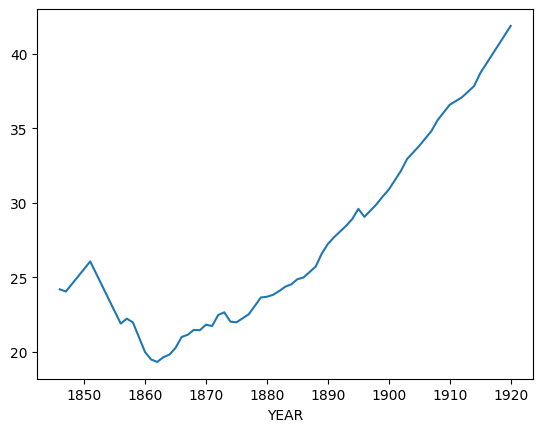

In [ ]:
# groupby by year and compute the mean for the seniority column
df.groupby(['YEAR'])['SENIORITY'].mean().plot()

To make plotting prettier and easier, we can use the seaborn library.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

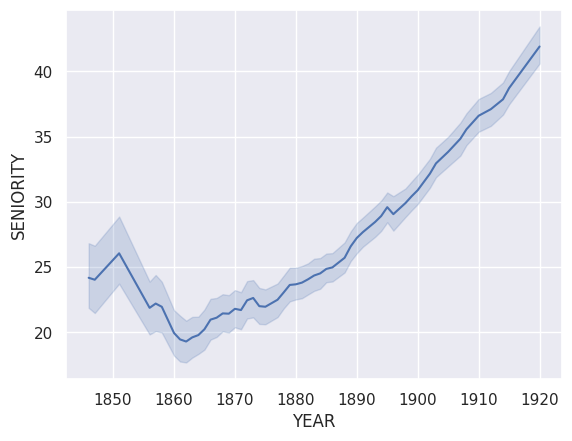

In [ ]:
import seaborn as sns
sns.set()
sns.lineplot(x='YEAR',y='SENIORITY', data=df)

Let's inspect how seniority relates to the political orientation of a newspaper.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

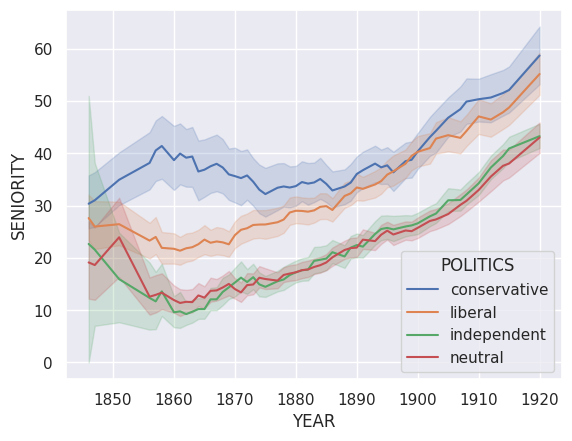

In [ ]:
# subset data to row containing a specific set of political labels
data = df[df['POLITICS'].isin(['liberal', 'conservative','independent','neutral'])]
# make a lineplot
sns.lineplot(x='YEAR', # values for the x-axis
             y='SENIORITY', # values for the y-axis
             hue='POLITICS', # split data by values in this cell
             hue_order=['conservative', 'liberal','independent','neutral'], # the order of the colors/distinctions
             data=data # use this data
             )

Lastly, let's analyse and visualise how the seniority of newspaper titles differs by place. We will need to complete a few more processing steps to visualize this. Again, don't worry if Python is new to you, run the code and look at the outputs!

After running the code, you can download the file it produces ('by_place.csv') and explore it with a visualisation tool such as [kepler.gl](https://kepler.gl/).

In [ ]:
# remove rows without coordinates
df = df[df['PLACE_PUB_COORD'] != '(nan, nan)']
# group by place name and coordinates
by_place = df.groupby(['PLACE_PUB','PLACE_PUB_COORD']).agg({'SENIORITY':'mean', 'ID': 'count'}).reset_index()
# convert the coordinates from string to a tuple
by_place['PLACE_PUB_COORD'] = by_place['PLACE_PUB_COORD'].apply(eval)
# save coordinates in different columns
by_place['point_latitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[0])
by_place['point_longitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[1])
# remove the original column
by_place.drop('PLACE_PUB_COORD', axis=1, inplace=True)
# rename ID columns to COUNT
by_place.rename(columns={'ID':'COUNT'}, inplace=True)
# only keep places with more than 10 observation
by_place = by_place[by_place.COUNT > 10]
# save the result in csv file
by_place.to_csv('by_place.csv')
# now download the file and load it into kepler

In [ ]:
by_place

,PLACE_PUB,SENIORITY,COUNT,point_latitude,point_longitude
1,aberdare,20.183673,98,51.713056,-3.445000
2,aberdeen,39.910941,393,57.150000,-2.100000
4,abergavenny,18.500000,38,51.833056,-3.017222
5,abergele,25.980000,50,53.280000,-3.580000
6,abertillery,13.769231,26,51.730000,-3.130000
...,...,...,...,...,...
1268,wycombe,19.156250,64,51.638500,-0.807900
1269,wymondham,8.615385,13,52.570000,1.116000
1270,yarmouth,19.380597,134,52.633333,1.750000
1272,yeovil,86.270833,96,50.945200,-2.637000


### Case Study 2: Women in the press

Let's explore a different question, and study the press directories through a gendered lens.
- To what extent are women present?
- How does this change over time?

In [ ]:
# load the dataframe
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [ ]:
# replace not a number nan with empty spaces
df.fillna('', inplace=True)

In [ ]:
# show three random rows
df.sample(3)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
85302,MPD_1847_483,CID_007221,1847,BELFAST GENERAL ADVERTISER .,Gratis,neutral,1842,Saturday,Hugh MK endrick,,belfast,Q10686,"(54.596389, -5.93)","Belfast<SEP>6 , Wareing Street","[{'mention': 'Belfast', 'pos': 29, 'sent_idx':...","BELFAST GENERAL ADVERTISER . Saturday , Gratis..."
78986,MPD_1882_1309,CID_005144,1882,STOCKTON JOURNAL .,1d,conservative,1880,Saturday,W. T. Seymour,,stockton,Q989418,"(54.57, -1.32)",Stockton<SEP>South Stockton<SEP>Norton,"[{'mention': 'Stockton', 'pos': 29, 'sent_idx'...","STOCKTON JOURNAL . Saturday , 1d . Conservativ..."
83547,MPD_1877_1151,CID_006482,1877,WANTAGE CHRONICLE .,1d,independent,1875,Saturday,,J . Belcher and Son,wantage,Q953957,"(51.589, -1.427)",Wantage<SEP>Vale of White Horse<SEP>Vale,"[{'mention': 'Vale of White Horse', 'pos': 38,...","WANTAGE CHRONICLE . Saturday , 1d . Independen..."


In [ ]:
# inspect the values in the PERSONS columns
df['PERSONS'].unique()

array(['Henry Shaw', 'Robert Shaw', 'Robert Shaw Bond', ...,
       'C. E. Coward', 'T. W. Rowbottom', 'Wm. McDougall'], dtype=object)

In [ ]:
# how many different names are there?
len(df['PERSONS'].unique())

9724

In [ ]:
# what are the most frequent names
# does it contain women?
df['PERSONS'].value_counts()[:5]

,count
PERSONS,
,37412
W. E. Baxter,197
Henry Crossley,180
Horace Cox,149
Robert Ackrill,136


#### Processing names

In [ ]:
# get all the misses (i.e. PERSONS starting with miss)
[p for p in df['PERSONS'].unique() if p.lower().startswith('miss')]

['Miss Gore Kelly',
 'Miss Braddon<SEP>George Sharman',
 'Miss Dora Russell<SEP>George Sharman',
 'Miss Braddon<SEP>Walter Besant<SEP>H.',
 'Miss Batchellor',
 'Miss  Braddon',
 'Miss Braddon , Adeline Sergeant , W . Clark Russell , William Westalll<SEP>Mary Tillotson<SEP>William Brimelow',
 'Miss Braddon<SEP>Wilkie Collins<SEP>F. W. Robinson',
 'Miss Braddon , F . W . Robinson , J . utton',
 'Miss Braddon',
 'Miss Marryat',
 'Miss Dora Russell<SEP>G. Sharman']

In [ ]:
# split the PERSONS entry by <SEP> and then by white space
persons = [i.split() for p in df['PERSONS'].unique() for i in p.split('<SEP>')]

In [ ]:
# first five persons
persons[:5]

[['Henry', 'Shaw'],
 ['Robert', 'Shaw'],
 ['Robert', 'Shaw', 'Bond'],
 ['Richard', 'Shaw', 'Bond'],
 ['R.', 'S.', 'Bond']]

In [ ]:
# split the names out and print the first names
first_person = persons[0]
print(first_person)
first_name = first_person[0]
print(first_name)

['Henry', 'Shaw']
Henry


In [ ]:
# to process the names we
# - get the first element of the split names
# - get the lowercased version of the first name
# - strip any white spaces around the lowercased first name
first_names_unique = set([p[0].lower().strip() for p in persons if p])
# this reduces the number of names a lot!
len(first_names_unique)

922

In [ ]:
# We went through the first_names_unique manually and selected
# names and titles that might refer to women...
# then constructed a regex pattern that will match any name/title
female_first_name = ['sarah', 'mary', 'rebecca', 'mrs',  'miss', 'mary', 'maryanne', 'margaret',  'marie', 'louisa', 'honoria',
'helen', 'hannah', 'florence', 'evelyn', 'esther', 'ellizabeth', 'elizabeth', 'eliza', 'dora', 'catherine',
'annie', 'anne', 'anna', 'ann', 'alice', 'alicia']
regex_pattern = '|'.join([fr"\b{n}\b" for n in female_first_name])
print(regex_pattern)

\bsarah\b|\bmary\b|\brebecca\b|\bmrs\b|\bmiss\b|\bmary\b|\bmaryanne\b|\bmargaret\b|\bmarie\b|\blouisa\b|\bhonoria\b|\bhelen\b|\bhannah\b|\bflorence\b|\bevelyn\b|\besther\b|\bellizabeth\b|\belizabeth\b|\beliza\b|\bdora\b|\bcatherine\b|\bannie\b|\banne\b|\banna\b|\bann\b|\balice\b|\balicia\b


In [ ]:
# we apply the regex pattern to the PERSONS column
# for rows with a female name we have it return True, otherwise False
# we make it look a bit fancy using a tqdm progress bar
from tqdm import tqdm
tqdm.pandas()
pattern = re.compile(regex_pattern)
df['has_female_name'] = df['PERSONS'].progress_apply(lambda x: bool(pattern.search(x.lower())))

100%|██████████| 92266/92266 [00:00<00:00, 989690.26it/s]


In [ ]:
# the number of rows with female names
df['has_female_name'].sum()

779

In [ ]:
# the percentage of rows with female names
round((df['has_female_name'].sum() / len(df))*100,2)

0.84

In [ ]:
# we can zoom in on these rows
df[df['has_female_name'] == True]

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT,has_female_name
287,MPD_1878_500,CID_000006,1878,KENTISH GAZETTE .,3d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 3d . Conservative ...",True
288,MPD_1879_479,CID_000006,1879,KENTISH GAZETTE .,3d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 3d . Conservative ...",True
289,MPD_1880_548,CID_000006,1880,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . Conservatiyve...",True
290,MPD_1881_574,CID_000006,1881,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>urrey<SEP>Sussex<S...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . — Conservativ...",True
291,MPD_1882_583,CID_000006,1882,KENTISH GAZETTE .,2d,conservative,1717,Tuesday,Mary Ward,,canterbury,Q29303,"(51.278333, 1.0775)",East Kent<SEP>West Kent<SEP>Surrey<SEP>Sussex<...,"[{'mention': 'East Kent', 'pos': 29, 'sent_idx...","KENTISH GAZETTE . Tuesday , 2d . Conservative ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89895,MPD_1914_1738,CID_900701,1914,EVENING NORTH WILTS HERALD .,½ d,independent,1861,Diaily,MrS. Annie Piper,,swindon,Q200942,"(51.558333, -1.781111)",North Wilts<SEP>East Gloucestershire<SEP>West ...,"[{'mention': 'North Wilts', 'pos': 29, 'sent_i...","HEVENING NORTH WILTS HERALD . Diaily , ½ d . I...",True
89896,MPD_1915_1758,CID_900701,1915,EVENING NORTH WILTS HERALD .,½ d,independent,1861,Daily,MrS. Annie Piper,,swindon,Q200942,"(51.558333, -1.781111)",North Wilts<SEP>East Gloucestershire<SEP>West ...,"[{'mention': 'North Wilts', 'pos': 29, 'sent_i...","EVENING NORTH WILTS HERALD . Daily , ½ d . Ind...",True
90999,MPD_1875_776,,1875,LEIGH WEEKLY JOURNAL .,1d,,,ISSaturday,Florence Marryat,Tillotson & Son,leigh,Q2588021,"(53.4975, -2.515)",South West Lancashire,"[{'mention': 'South West Lancashire', 'pos': 2...",LEIGH WEEKLY JOURNAL . ( Also published ISSatu...,True
91241,MPD_1883_1809,,1883,"ROSCOMMON HERALD ,",4d,liberal,18393,Saturday,Honoria J. Tully,,belfast,Q10686,"(54.596389, -5.93)",Roscommon<SEP>Leitrim<SEP>Sligo<SEP>Mayo,"[{'mention': 'Roscommon', 'pos': 29, 'sent_idx...","ROSCOMMON HERALD , Saturday , 4d . Liberal . —...",True


In [ ]:
# zoom in on the actual text to get more information
# on the role of women in the press
# change the idx to a number smaller than 779
idx = 1
df.loc[df['has_female_name'] == True].iloc[idx]['TEXT']

'KENTISH GAZETTE . Tuesday , 3d . Conservative . — Established 1717 . Circulates through East Kent , and portions of West Kent , Surrey , Sussex , and Middlesex . Advocates the agricultural interest chiefly . Is attached to the Church of England , and the friend of religious toleration . It gives full reports of all local matters , in addition to foreign and general intelligence , the London markets , & c . Proprietress — Mary Ward .'

In [ ]:
# what are the titles
df[df['has_female_name'] == True]['TITLE'].unique()

array(['KENTISH GAZETTE .', 'ESSEX STANDARD . ', 'ESSEX STANDARD .',
       'ESSEX STANDARD AND EASTERN COUNTIES ADVERTISER .',
       'ESSEX STANDARD , WEST SUFFOLK GAZETTE , AND EASTERN COUNTIES ADVERTISER .',
       'LINCOLN , RUTLAND , AND STAMFORD MERCURY .',
       'CAERMARTHEN JOURNAL .', 'THE JOURNAL .', 'BELFAST NEWS LETTER .',
       'LIMERICK CHRONICLE .', 'LONDONDERRY SENTINEL .',
       'NENAGH GUARDIAN .', 'CARLOW SENTINEL .', 'KILKENNY JOURNAL .',
       'SLIGO CHAMPION .', 'WELLS JOURNAL .', 'HAMPSHIRE TELEGRAPH .',
       'HAMPSHIRE TELEGRAPH AND SUSSEX CHRONICLE .', 'WEST BRITON .',
       'LIVERPOOL MERCURY .', 'EAST OF FIFE RECORD .', 'ANGLO-CELT .',
       'KENT COAST TIMES .', 'COAST TIMES .', 'BERWICK ADVERTISER .',
       'CHESTER CHRONICLE .', 'DERBYSHIRE COURIER .',
       'STIRLING JOURNAL AND ADVERTISER .', 'DROGHEDA ARGUS .',
       'BOLTON EVENING NEWS .',
       '" MAN OF ROSS , " FOREST OF DEAN , AND WEST OF ENGLAND ADVERTISER .',
       'ECCLES ADVERTIS

In [ ]:
# what is the political leaning of these newspapers?
df[df['has_female_name'] == True]['POLITICS'].value_counts(normalize=True)[:5]

,proportion
POLITICS,
liberal,0.382542
conservative,0.283697
independent,0.115533
neutral,0.105263
national,0.035944


In [ ]:
# how does this compare the newspaper landscape?
df['POLITICS'].value_counts(normalize=True)[:5]

,proportion
POLITICS,
liberal,0.236750
independent,0.189170
neutral,0.186483
conservative,0.149578
,0.142382


<Axes: xlabel='YEAR'>

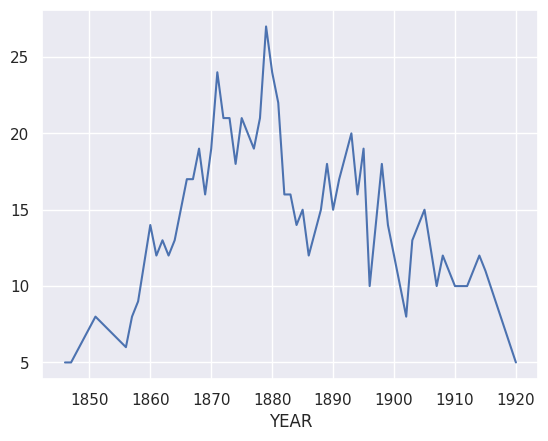

In [ ]:
# what about changes over time?
df[df['has_female_name'] == True].groupby(['YEAR']).size().plot()

<Axes: xlabel='YEAR'>

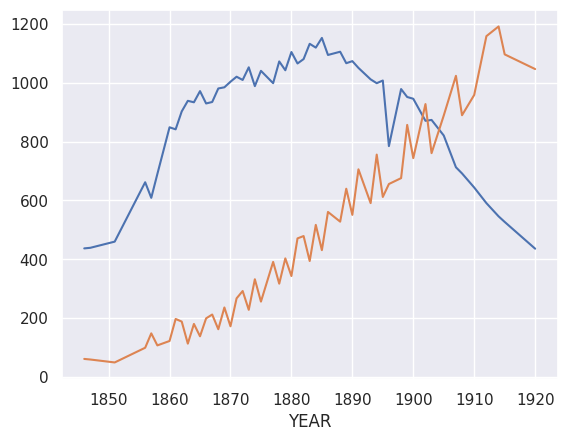

In [ ]:
df.groupby(['YEAR'])['PERSONS'].nunique().plot()
df.groupby(['YEAR'])['ORGANIZATIONS'].nunique().plot()

### Case Study 3: Your Turn!

What else would you like to find out?

In [ ]:
# let's start coding

![bye](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbmFzOHBqaTBiYXh0bGczZ2t3a3VtanRrMWNmZ2owcTVnNGtxMXp3NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Z5PxhW6BlWJjCkoPIQ/giphy.gif)

# Fin.